# Data Cleaning and Preprocessing

## Objective: 
Make sure that the data is in a suitable format for a classifier and that there is no missing values.

# 1 Import Data

## 1.1 Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import levene, ttest_ind
import spacy
from collections import Counter
import re
from autocorrect import Speller

## 1.2 Load data

In [2]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# 2 Inspect The Data

## 2.1 Inspect The Heads Of The Dataframes

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## 2.2 See If The Classes Are Balanced

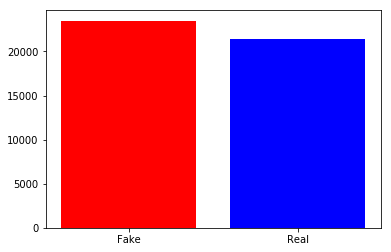

In [5]:
plt.bar(["Fake", "Real"], [len(fake), len(real)], color=["red", "blue"])
plt.show()

The classes seem to be well balanced.

## 2.2 Examine The Distribution Of The "Subject" Values

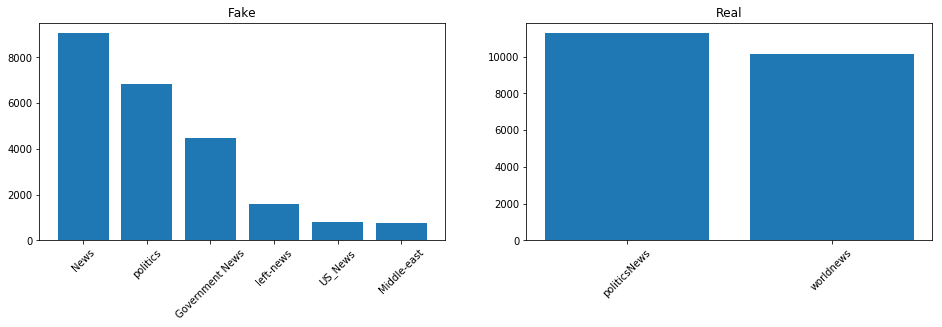

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.set_title("Fake")
ax1.bar(fake.subject.unique(), fake.subject.value_counts())

ax2.set_title("Real")
ax2.bar(real.subject.unique(), real.subject.value_counts())

for tick in ax1.get_xticklabels() + ax2.get_xticklabels():
    tick.set_rotation(45)

plt.show()

It seems the subjects are unique to each dataframe making it impossible to gain meaningful insights from them.

## 2.3 Inspect The Contents Of The "Text" Columns

In [7]:
# fake
for article in fake.text.iloc[:5]:
    print(article, "\n\n\n")

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In the data I can see that there are twitter handels and hyper-links. These should be removed because these things can be giveaways.

In [8]:
# real
for article in real.text.iloc[:5]:
    print(article, "\n\n\n")

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

The data contains contains information on the publisher (notice "reuters"). This may be a give away on the class of an article and should be removed.

## 2.4 Inspect The Content Of The "Title" Columns

In [9]:
for n in range(6):
    print(fake.title.iloc[n], "\n")
    print(real.title.iloc[n], "\n")

 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing 

As U.S. budget fight looms, Republicans flip their fiscal script 

 Drunk Bragging Trump Staffer Started Russian Collusion Investigation 

U.S. military to accept transgender recruits on Monday: Pentagon 

 Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’ 

Senior U.S. Republican senator: 'Let Mr. Mueller do his job' 

 Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES) 

FBI Russia probe helped by Australian diplomat tip-off: NYT 

 Pope Francis Just Called Out Donald Trump During His Christmas Speech 

Trump wants Postal Service to charge 'much more' for Amazon shipments 

 Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES) 

White House, Congress prepare for talks on spending, immigration 



It appears all of the fake news titles may begin with a space.

In [10]:
for n in range(6):
    print("'", fake.title.iloc[n][0], "'\n")
    print("'", real.title.iloc[n][0], "'\n")

'   '

' A '

'   '

' U '

'   '

' S '

'   '

' F '

'   '

' T '

'   '

' W '



The fake titles do begin with a space.

## 2.5 Inspect The "Date" Columns

In [11]:
real.date[0]

'December 31, 2017 '

In [12]:
fake.date[0]

'December 31, 2017'

Here I can see the last character in the real dates is whitespace. Next I will see if there are any values that can not be turned into a date (year) and if their are I will change them to a NaN value.

In [13]:
def deturmine_date(date, n):
    try:
        return int(date[n:])
    except:
        return np.nan
    

In [14]:
fake.date = fake.date.map(lambda x: deturmine_date(x, -2))
real.date = real.date.map(lambda x: deturmine_date(x, -3))

Now I will check to see how many NaNs there are.

In [15]:
fake.date.isna().sum()

10

Next I will drop the NaNs.

In [16]:
fake = fake.dropna()

In [17]:
real.date.isna().sum()

0

Now I will double check the minimum and maximum values of the dates

In [18]:
print(f"Fake: \nMin:{fake.date.min()} Max:{fake.date.max()}\n")
print(f"Real: \nMin:{real.date.min()} Max:{real.date.max()}")

Fake: 
Min:15.0 Max:18.0

Real: 
Min:16 Max:17


Now I will plot histograms to see how the dates are distributed. Hopefully the real and fake news are around the same date range.

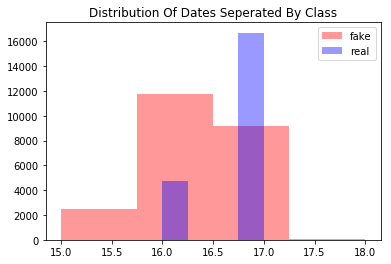

In [19]:
plt.hist(fake.date, color="red", alpha=0.4, bins=4, label="fake")
plt.hist(real.date, color="blue", alpha=0.4, bins=4, label="real")
plt.legend()
plt.title("Distribution Of Dates Seperated By Class")
plt.show()

Next I will perform statistical tests to see if the dates are statisticaly significantly different (i.e. they come from different populations) I will do this by first using the central limit theorem to make the distributions of the dates normal then checking to see if their variances are statisticaly significantly different and then based on that I will choose whether to use a studen'ts t-test or a welch's t-test. The alpha levels will be all be 0.05. So to start off I will say my null hypothesis is that the date's variances have no significant difference in variance and my alternative hypothesis is that the date's variances do have a significant difference.

In [20]:
# central limit therom
real_dates = pd.Series([])
for i in range(500): 
    real_dates = pd.concat([real_dates, real.date.sample(frac=0.5)])
    
fake_dates = pd.Series([])
for i in range(500): 
    fake_dates = pd.concat([fake_dates, fake.date.sample(frac=0.5)])
    
real_dates.head()

15536    17
6276     17
2483     17
11292    17
13065    17
dtype: int64

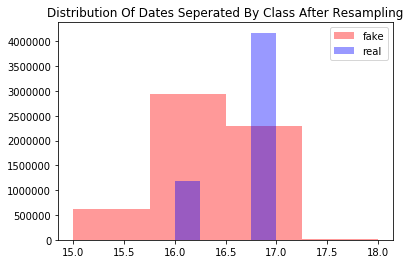

In [21]:
# plot for data after resampling
plt.hist(fake_dates, color="red", alpha=0.4, bins=4, label="fake")
plt.hist(real_dates, color="blue", alpha=0.4, bins=4, label="real")
plt.legend()
plt.title("Distribution Of Dates Seperated By Class After Resampling")
plt.show()

In [22]:
# Levene test
# null hpyothesis: variances of dates are not significantly different
# alternative hypothesis: variances of dates are significantly different
# alpha value: 0.05
levene(real_dates, fake_dates)

LeveneResult(statistic=1028564.170090612, pvalue=0.0)

The p-value of the levene test was below the alpha value of 0.05 so I must regect the null hypothesis that the variances are not significantly different. This leads me to use a welch's t-test to see if the dates are significantly different. My null hypothesis will be that the dates are not significantly different and my alternative hypothesis will be that the dates are significantly different. My alpha value will be 0.05

In [23]:
# welch's t-test
# null hypothesis: dates are not significantly different (i.e. differences in dates could be from random chance)
# alternative hypothesis dates are significantly different
ttest_ind(real_dates, fake_dates, equal_var=False)

Ttest_indResult(statistic=1523.2699275679456, pvalue=0.0)

The null hypothsis must be rejected and I can conclude their is a statisticaly significant difference in the dates.

# 3 Combine Data

## 3.1 Create A Column To Distinguish Class

In [24]:
# create new column for class
real["real_news"] = 1
fake["real_news"] = 0

## 3.2 Concatinate DataFrames

In [25]:
# combine the two dataframes
data = pd.concat([real, fake], axis=0)
data.head()

,title,text,subject,date,real_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,17.0,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,17.0,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,17.0,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,17.0,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,17.0,1


# 4 Clean Data

## 4.1 Drop Date And Subject Columns

In [26]:
# drop date and subject
data.drop("date", axis=1, inplace=True)
data.drop("subject", axis=1, inplace=True)

## 4.3 Remove Publishers

I will remove the publisher information by searching to see if there is a hyphen in the first 150 characters of text and if there is I will remove all characters around and before that hyphen.

In [27]:
# remove publisher by finding hyphens
def remove_publisher(text):
    if "reuters" in text.lower():
        index = text[:150].find("-") + 2
        text = text[index:]
    return text

In [28]:
# apply changes to data
data.text = data.text.map(lambda x: remove_publisher(x))

In [29]:
# inspect the data before changes
real.text.iloc[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [30]:
# inspect the data after changes
data[data.real_news==1].text.iloc[0]

'The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific researc

It seems to have worked successfully

## 4.4 Remove Twitter Handels

To remove the twitter handels I will split the text into individual words and remove any words with an "@" symbol.

In [31]:
# remove twitter handels by finding the @ sign
def remove_twitter(text):
    words = text.split(" ")
    non_twitter_words = []
    for word in words:
        if "@" not in word:
            non_twitter_words.append(word)
    return " ".join(non_twitter_words)

In [32]:
# apply changes
data.text = data.text.map(lambda x: remove_twitter(x))

In [33]:
# data before changes
fake.text.iloc[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [34]:
# data after changes
data[data.real_news==0].text.iloc[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to ris

## 4.5 Check For And Deal With Empty Text And Title Values

In [35]:
# check for empty titles and text bodies
data.title = data.title.map(lambda x: np.nan if x.strip() == "" else x)

data.text = data.text.map(lambda x: np.nan if x.strip() == "" else x)

In [36]:
data.isna().sum()

title          0
text         631
real_news      0
dtype: int64

In [37]:
data = data.dropna()

## 4.6 Combine Title And Text

In [38]:
data.text = data.title + data.text

In [39]:
data.drop("title", axis=1, inplace=True)

## 4.7 Remove extra whitespace

In [40]:
def remove_whitespace(string):
    return re.sub(" +", " ", string)

data.text = data.text.map(lambda x: remove_whitespace(x))

## 4.8 Check for misspelled words

I will use spacy to list all stop words and then, after taking into account stop words, I will display the 25 most common words. If there are errors in those words I will then fix them using the replace method.

In [41]:
# load english into spacy
nlp = spacy.load("en_core_web_sm")

In [42]:
# get lists of words and remove stopwords
joined_text = " ".join(data.text)
all_words = joined_text.split(" ")
not_stop = []
for word in all_words:
    if word not in spacy.lang.en.stop_words.STOP_WORDS:
        not_stop.append(word)

cnt = Counter(not_stop)
cnt.most_common(25)

[('s', 172238),
 ('Trump', 110581),
 ('The', 93949),
 ('said', 93120),
 ('I', 53588),
 ('U.S.', 47707),
 ('t', 41966),
 ('', 35107),
 ('people', 33091),
 ('President', 31825),
 ('Donald', 26427),
 ('said.', 26141),
 ('He', 24554),
 ('It', 23818),
 ('Republican', 23363),
 ('told', 23210),
 ('Obama', 22988),
 ('United', 22827),
 ('House', 22788),
 ('In', 22456),
 ('Clinton', 22341),
 ('government', 21750),
 ('like', 20529),
 ('White', 17183),
 ('new', 16964)]

I notice some stray "t"s and "s"s, also a few empty quotes.

In [43]:
# find errors
def find_error(series, pattern, n):
    for article in series:
        if pattern in article:
            print(article[article.find(pattern)-20 : article.find(pattern)+20])
            n -= 1
            if n < 1:
                break

In [44]:
# print error
find_error(data.text, " t ", 3)

believe that he didn t commit any crime,
d Rogozin. They didn t get the coordinat
believe that he didn t commit any crime,


In [45]:
# print error
find_error(data.text, " s ", 3)

g the United States’ s global dominance,
e brash billionaire’ s campaign to the r
ew York billionaire’ s inflammatory rhet


In [46]:
# print error
find_error(data.text, "''", 2)

azon wind up 'smokin'' quarter for big t
all(this);osdlfm(-1,'','BLVkkfH7YVv_nKIS


In [47]:
# replacing errors
def replace_error(string):
    string = string.replace(" t ", "'t ")
    string = string.replace(" s ", "s ")
    string = string.replace("''", "")
    return string

data.text = data.text.map(lambda x: replace_error(x))

In [48]:
# finding more errors
find_error(data.text, " t ", 3)
find_error(data.text, " s ", 3)
find_error(data.text, "''", 3)

tant thing. I didn't t get elected to se
tant thing. I didn't t get elected to se
w quickly the states s No. 1 industry re
 to do” [Video]Heres s interview with ab
 to do” [Video]Heres s interview with ab


In [49]:
# removing the extra characters
def remove_error(string):
    string = string.replace(" t ", "")
    string = string.replace(" s ", "")
    return string
    
data.text = data.text.map(lambda x: remove_error(x))

In [50]:
# double check if there are any more errors
find_error(data.text, " t ", 3)
find_error(data.text, " s ", 3)

## 5 Train / Val / Test Split

In [51]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [52]:
train, val = train_test_split(train, random_state=42)

## 7 Save Data

In [53]:
train.to_csv("train_clean.csv", index=False)

In [54]:
val.to_csv("val_clean.csv", index=False)

In [55]:
test.to_csv("test_clean.csv", index=False)